# Fourier analysis

So, the story so far:

Looking to see if there is a relationship between the tidal pattern in
pressure data and the moon.

The pressure data gives a waveform.  The Fourier transform of this data we can converts the data from a time series to give us the underlying frequencies driving that data.


In [111]:
# Tell matplotlib to plot in line
%matplotlib inline
import pandas as pd

# seaborn magically adds a layer of goodness on top of Matplotlib
# mostly this is just changing matplotlib defaults, but it does also
# provide some higher level plotting methods.
import seaborn

# Tell seaborn to set things up
seaborn.set()

from matplotlib import pyplot

import mpld3


In [112]:
# interactive plots -- except in ein

#mpld3.enable_notebook()

In [113]:
infile="../files/moon_weather.csv"

In [114]:
import numpy
from numpy import fft

In [115]:
data = pd.read_csv(infile, index_col='date', parse_dates=['date'])


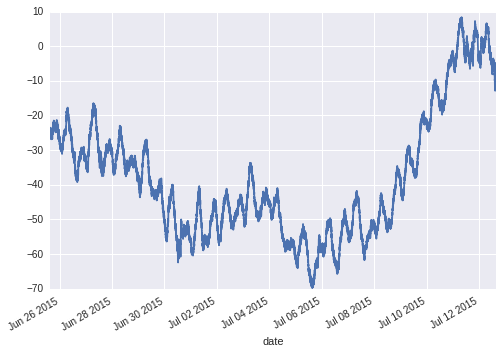

In [116]:
data.altitude[:24480].plot()

In [117]:
data.describe()

,altitude,pressure,sealevel_pressure,temp,moon_phase,moon_glat,moon_glon,tide
count,30397.000000,0,0,30397.000000,30397.000000,30397.000000,30397.000000,30397.000000
mean,-31.879161,NaN,NaN,29.392555,58.143320,0.009210,3.272469,12.141895
std,20.589351,NaN,NaN,0.894486,36.001448,0.063526,1.943755,6.996605
min,-69.792586,NaN,NaN,27.200000,0.172035,-0.087831,0.000126,-0.087386
25%,-50.325302,NaN,NaN,28.700000,22.124449,-0.062341,1.274654,5.998249
50%,-34.975717,NaN,NaN,29.400000,69.537071,0.026644,3.743553,12.296909
75%,-10.941520,NaN,NaN,30.000000,91.296631,0.070193,4.961365,18.230285
max,8.379000,NaN,NaN,31.500000,99.811104,0.087505,6.283139,24.070675


In [118]:
24480/720.
#(60. * 12)

34.0

In [119]:
N = 24480
fft_altitude = fft.fft(data[:N].altitude)

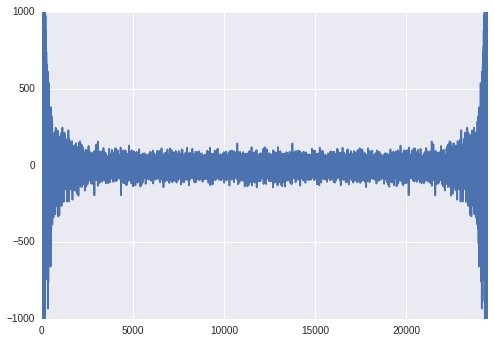

In [120]:

# Plot the transform.  Most of the energy in the signal is at low frequencies
pd.Series(x.real for x in fft_altitude).clip(-1000, 1000)[:].plot()

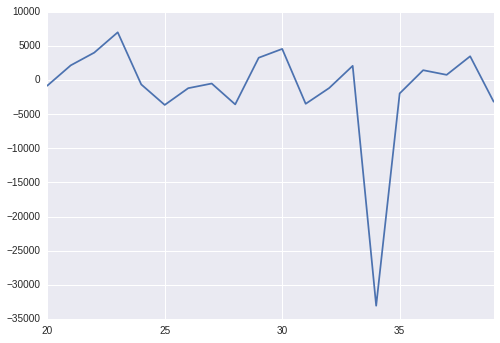

In [121]:
# spike of energy at location 34
pd.Series(x.real for x in fft_altitude)[20:40].plot()

In [150]:
# Convert location into period
point = 34
for p in (point-1, point, point+1):
    print(p)
    print("%8.3f %s" % (N/p, "minutes"))
    print("%8.3f %s" % (N/(p * 60), "hours"))
    print("%8.3f %s" % (N/(p * 60 * 24), "days"))


33
 741.818 minutes
  12.364 hours
   0.515 days
34
 720.000 minutes
  12.000 hours
   0.500 days
35
 699.429 minutes
  11.657 hours
   0.486 days


The spike of energy at location 34 corresponds to a signal with a period of 12 hours.

Note that the amount of data available limits the resolution of transform.

A peak at position 33 would give a period roughly 22 minutes longer,
at 35 it would be 21 minutes shorter.

It looks like the *tidal* pattern in the pressure data has a period of 24 hours.

Hence, it looks like it is driven by the sun, not the moon.

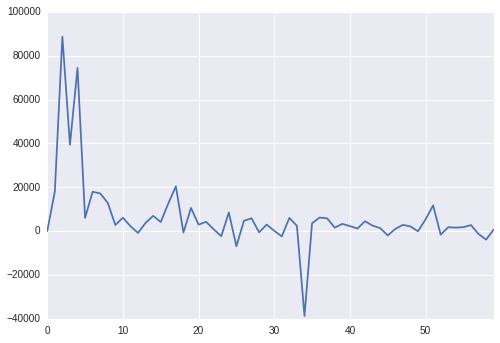

In [123]:
# transform is complex, look at the imaginary component
pd.Series(x.imag for x in fft_altitude)[0:60].plot()

In [124]:
# remove 12 hour and higher freq components:
xx = fft_altitude.copy()
xx[point:-point] = 0.0
xx[int(point/2)] = 0.0
#xx[point+1:] = 0.0

In [125]:
smooth_altitude = fft.ifft(xx)

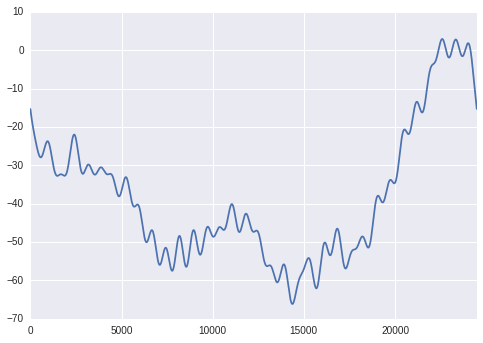

In [126]:
pd.Series(y.real for y in smooth_altitude).plot()

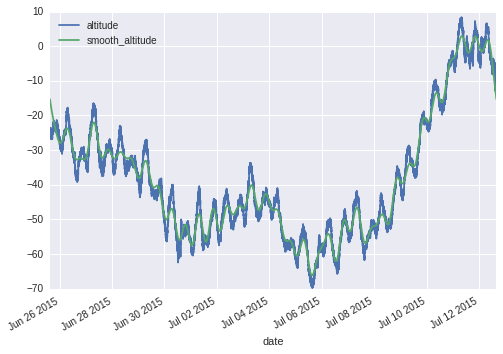

In [133]:
df = pd.DataFrame()
df['altitude'] = data.altitude[:N]
df['smooth_altitude'] = [y.real for y in smooth_altitude]

df.plot(subplots=False)

/home/jng/.virtualenvs/peakrisk2/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


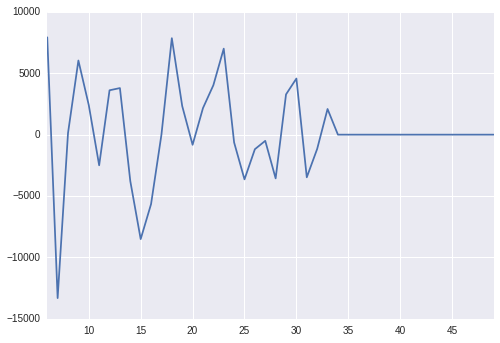

In [147]:
smdf = pd.DataFrame(dict(smooth_altitude=smooth_altitude, fft_alt=fft.fft(smooth_altitude)))
smdf.fft_alt[6:50].plot()

In [157]:
# moon takes 29.53 days to be in same position relative to earth/sun

N/(29.53 * 24 * 60)

0.5756857433118862

In [135]:
pd.Series(fft.fft(df.smooth_altitude)

array([-931957.98424361    +0.j        ,  255374.61463530+17993.92648614j,
         92024.57013790+88700.72926733j, ...,
        -31904.27748675-39364.56851422j,   92024.57013790-88700.72926733j,
        255374.61463530-17993.92648614j])

In [129]:
import math
sine = [numpy.sin(x/math.pi) for x in range(1000)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f535e1fd908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f535e306f60>], dtype=object)

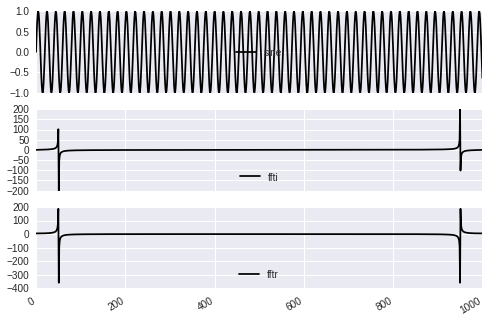

In [130]:
xfft = fft.fft(sine)

df = pd.DataFrame()
df['sine'] =sine
df['ffti'] = [x.imag for x in xfft]
df['fftr'] = [x.real for x in xfft]
df[:].plot(subplots=True)

In [131]:
df.describe()

,sine,ffti,fftr
count,1000.000000,1.000000e+03,1.000000e+03
mean,0.005197,-5.684342e-17,-9.947598e-17
std,0.706704,1.081976e+01,1.955480e+01
min,-0.999981,-1.990662e+02,-3.577702e+02
25%,-0.699680,-4.233174e-01,-5.654399e-02
50%,0.012879,-5.190293e-15,2.330771e-01
75%,0.709885,4.233174e-01,2.929166e-01
max,0.999983,1.990662e+02,1.862269e+02


In [132]:
df.head(20)

,sine,ffti,fftr
0,0.000000,0.000000,5.197500
1,0.312962,0.052948,5.199377
2,0.594481,0.106019,5.205016
3,0.816273,0.159337,5.214444
4,0.956056,0.213027,5.227705
5,0.999785,0.267219,5.244862
6,0.943067,0.322045,5.265998
7,0.791600,0.377643,5.291215
8,0.560603,0.434158,5.320637
9,0.273282,0.491741,5.354412


$$A_k =  \sum_{m=0}^{n-1} a_m \exp\left\{-2\pi i{mk \over n}\right\}
   \qquad k = 0,\ldots,n-1.$$

$$a_m = \exp\{2\pi i\,f m\Delta t\}$$

where $\Delta t$ is the sampling interval